<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Summary:
This project involves building and training a Convolutional Neural Network (CNN) using the MNIST dataset to classify handwritten digits. The MNIST dataset contains 60,000 training images and 10,000 testing images, each of which is a 28x28 grayscale image representing a digit from 0 to 9. The goal is to achieve high accuracy in digit classification.

### Model Architecture:
The CNN model consists of the following layers:

### Conv2d Layer 1:
Takes in a single-channel image (1, 28, 28) and outputs 32 channels. The kernel size is 3x3, with a stride of 1 and padding of 1 to preserve the input dimensions.
### MaxPool Layer 1:
Reduces the spatial dimensions by half using a 2x2 kernel with a stride of 2.
### Conv2d Layer 2:
Takes in the 32 channels from the previous layer and outputs 64 channels. The kernel size is 3x3, with a stride of 1 and padding of 1.
### MaxPool Layer 2:
Again reduces the spatial dimensions by half.
### Fully Connected Layer 1: After flattening the feature maps, it connects to 128 neurons.
### Fully Connected Layer 2:
Connects the 128 neurons to 10 output neurons, corresponding to the 10 digit classes.
### Training and Validation:
Epochs: 10
Batch Size: 64
Optimizer: Adam with a learning rate of 0.001
Loss Function: Cross-Entropy Loss

### Performance Metrics:
Training Accuracy: Percentage of correct predictions on the training dataset.
Validation Accuracy: Percentage of correct predictions on the validation dataset.
Test Accuracy: Percentage of correct predictions on the test dataset.

### Results:
After training for 10 epochs, the model achieved the following results:

#### Training Accuracy:
Consistently high, indicating the model is learning the training data well.
#### Validation Accuracy:
Close to the training accuracy, suggesting the model generalizes well to unseen data.
#### Test Accuracy:
Achieved a high test accuracy of 98.99%, demonstrating the model's robustness and effectiveness in classifying handwritten digits.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:

# 1. Load and Normalize the Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [ ]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
#Splitting the training, validation, and testing set:

train_size = int(0.8*len(training_data))
val_size = len(training_data)-train_size
train_data, val_data = random_split(training_data, [train_size, val_size])


In [ ]:
#Creating a batch_size: using batch 64 as it is commonly used for training models like MNIST

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size = 64, shuffle =False)
test_loader = DataLoader(testing_data, batch_size=64, shuffle=False)

In [ ]:
#Creating a class that instantiate a CNN module:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels = 32, kernel_size =3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding =0)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels = 64, kernel_size =3, stride=1, padding=1)
    self.fc1 = nn.Linear(64*7*7, 128)
    self.fc2 = nn.Linear(128, 10)
    self.relu = nn.ReLU()
    # self.dropout = nn.Dropout(0.5)


  def forward(self, X):
    X = self.pool(F.relu(self.conv1(X)))
    X = self.pool(F.relu(self.conv2(X)))
    X = X.view(-1, 64*7*7)
    X = F.relu(self.fc1(X))
    # X = self.dropout(X)
    X = self.fc2(X)


    return F.log_softmax(X, dim=1)





In [ ]:
torch.manual_seed(42)
model = CNN()

In [ ]:
model

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

In [ ]:
#Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import time

start_time = time.time()
#Create variables to track things

epochs = 10
train_losses =[]
val_losses = []
train_accuracies =[]
val_accuracies = []

for epoch in range(epochs):
  model.train()
  running_loss, correct, total =0.0,0,0
  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  train_losses.append(running_loss/len(train_loader))
  train_accuracies.append(100*correct/total)


  model.eval()
  running_loss, correct, total = 0.0,0,0
  with torch.no_grad():
    for images, labels in val_loader:
      outputs = model(images)
      loss = criterion(outputs, labels)
      running_loss +=loss.item()
      _, predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted ==labels).sum().item()
  val_losses.append(running_loss/len(val_loader))
  val_accuracies.append(100*correct/total)

  print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')


current_time = time.time()

total = current_time - start_time

print(f'Training Time: {total/60} Minutes')

Epoch [1/10], Train Loss: 0.1919, Val Loss: 0.0617, Train Acc: 94.20, Val Acc: 98.03
Epoch [2/10], Train Loss: 0.0532, Val Loss: 0.0492, Train Acc: 98.34, Val Acc: 98.42
Epoch [3/10], Train Loss: 0.0366, Val Loss: 0.0377, Train Acc: 98.89, Val Acc: 98.88
Epoch [4/10], Train Loss: 0.0259, Val Loss: 0.0440, Train Acc: 99.18, Val Acc: 98.67
Epoch [5/10], Train Loss: 0.0206, Val Loss: 0.0361, Train Acc: 99.29, Val Acc: 99.03
Epoch [6/10], Train Loss: 0.0156, Val Loss: 0.0402, Train Acc: 99.51, Val Acc: 98.86
Epoch [7/10], Train Loss: 0.0125, Val Loss: 0.0394, Train Acc: 99.57, Val Acc: 98.88
Epoch [8/10], Train Loss: 0.0103, Val Loss: 0.0377, Train Acc: 99.65, Val Acc: 99.00
Epoch [9/10], Train Loss: 0.0074, Val Loss: 0.0490, Train Acc: 99.76, Val Acc: 98.87
Epoch [10/10], Train Loss: 0.0081, Val Loss: 0.0402, Train Acc: 99.73, Val Acc: 99.10
Training Time: 12.065629176298778 Minutes


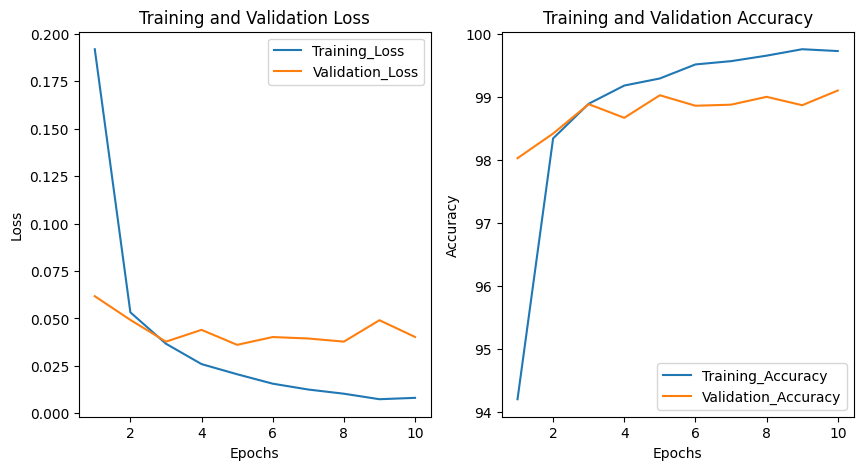

In [ ]:
#Plot the training loss and validation loss as a function of epochs.
#Plot the both training accuracy and validation accuracy as a function of epochs

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, label ='Training_Loss')
plt.plot(range(1, epochs+1), val_losses, label = 'Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_accuracies, label = 'Training_Accuracy')
plt.plot (range(1, epochs+1), val_accuracies, label = 'Validation_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
# 5. Evaluate on Test Data
model.eval()
correct, total =0,0

with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  test_accuracy = 100*correct/total
  print(f'Test_Accuracy: {test_accuracy:.2f}%')




Test_Accuracy: 98.99%


### Conclusion:
The high test accuracy of 98.99% indicates that the CNN model is highly effective at classifying handwritten digits from the MNIST dataset. The careful design of the model architecture, coupled with normalization (Provided in the assignment) and effective optimization, contributes to its strong performance. This model can serve as a robust baseline for further enhancements, such as incorporating data augmentation and dropout regularization, to potentially achieve even better results.